# Ortogonalização e o *Double Machine Learning* (DML)

Prof. Daniel de Abreu Pereira Uhr

## Conteúdo

* Ortogonalização
  * Aplicação do Procedimento de Ortogonalização no Python
* DML - Orthogonal/Double Machine Learning
  * Partially Linear Regression Models (PLR)
  * Partially Linear IV Regression Models (PLIV)
  * Interactive regression models (IRM)
  * Interactive IV regression models (IIVM)
* Aplicação do DML em Python
  * Partially Linear Regression Models* (PLR) - EconML - LinearDML
    * ATE
    * CATE
    * CATE para características específicas



## Referências

**Principais:**
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W., & Robins, J. (2018). Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, Volume 21, Issue 1, 1 February 2018, Pages C1–C68, https://doi.org/10.1111/ectj.12097
* Chernozhukov
* Microsoft EconML: https://econml.azurewebsites.net/
* UBER CausalML: https://causalml.readthedocs.io/en/latest/
* DoubleML for python: https://github.com/DoubleML/doubleml-for-py ou https://docs.doubleml.org/stable/index.html

**Complementares:**
* Chernozhukov, V. and C. Hansen (2004). The effects of 401 (k) participation on the wealth distribution: an instrumental quantile regression analysis. Review of Economics and Statistics 86, 735–51. 
* Chernozhukov, V., D. Chetverikov and K. Kato (2014). Gaussian approximation of suprema of empirical processes. Annals of Statistics 42, 1564–97. 
* Chernozhukov, V., J. Escanciano, H. Ichimura, W. Newey and J. Robins (2016). Locally robust semiparametric estimation. Preprint (arXiv:1608.00033). 
* Chernozhukov, V., C. Hansen and M. Spindler (2015a). Post-selection and post-regularization inference in linear models with very many controls and instruments. Americal Economic Review: Papers and Proceedings 105, 486–90. 
* Chernozhukov, V., C. Hansen and M. Spindler (2015b). Valid post-selection and post-regularization inference: an elementary, general approach. Annual Review of Economics 7, 649–88.
* Bach, P., Chernozhukov, V., Kurz, M. S., and Spindler, M. (2022), DoubleML - An Object-Oriented Implementation of Double Machine Learning in Python, Journal of Machine Learning Research, 23(53): 1-6, https://www.jmlr.org/papers/v23/21-0862.html.
* Bach, P., Chernozhukov, V., Kurz, M. S., Spindler, M. and Klaassen, S. (2024), DoubleML - An Object-Oriented Implementation of Double Machine Learning in R, Journal of Statistical Software, 108(3): 1-56, doi:10.18637/jss.v108.i03, arXiv:2103.09603.
* Chernozhukov, V., Chetverikov, D., Demirer, M., Duflo, E., Hansen, C., Newey, W. and Robins, J. (2018), Double/debiased machine learning for treatment and structural parameters. The Econometrics Journal, 21: C1-C68, doi:10.1111/ectj.12097.
* Lang, M., Binder, M., Richter, J., Schratz, P., Pfisterer, F., Coors, S., Au, Q., Casalicchio, G., Kotthoff, L. and Bischl, B. (2019), mlr3: A modern object-oriented machine learing framework in R. Journal of Open Source Software, doi:10.21105/joss.01903.
* Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011), Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12: 2825–2830, https://jmlr.csail.mit.edu/papers/v12/pedregosa11a.html.


**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---

## Ortogonalização

A ideia de ortogonalização é baseada em um teorema elaborado por três econometristas em 1933, Ragnar Frisch, Frederick V. Waugh e Michael C. Lovell. Simplificando, afirma que você pode decompor qualquer modelo de regressão linear multivariável em três estágios ou modelos. 

Digamos que você tem uma matriz de covariáveis $X$, e voce particiona ela em duas partes, $X_{1}$ e $D$. 

* **Primeira Etapa**

Pegamos o primeiro conjunto de variáveis $X_{1}$ e fazemos uma regressão linear de $X_{1}$ em $Y$, onde $\theta_{1}$ é o vetor de parâmetros

$$ y_{i} = \theta_{0} + \theta_{1} X_{1i} + \epsilon_{i}$$

e guardamos os resíduos dessa regressão ($y^{*}$).

$$ y^{*}_{i} = y_{i} - \hat{y}_{i} = y_{i} - ( \hat{\theta}_{0} + \hat{\theta}_{1} X_{1i} )$$

* **Segunda Etapa**

Pegamos novamente o primeiro conjunto de características, mas agora executamos um modelo onde estimamos o segundo conjunto de características ($D$)

$$ D_{i} = \gamma_{0} + \gamma_{1} X_{1i} + e_{i}$$

Aqui, estamos usando o primeiro conjunto de recursos para prever o segundo conjunto de recursos. Por fim, consideramos também os resíduos desta segunda etapa.

$$ D_{i}^{*} = D_{i} - (\hat{\gamma_{0}} + \hat{\gamma_{1}} X_{1i})$$

* **Terceira etapa**

Por fim, pegamos os resíduos do primeiro e do segundo estágio e estimamos o seguinte modelo

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


* **Teorema Frisch – Waugh – Lovell (FWL)**

O teorema FWL afirma que a estimativa do parâmetro $\hat{\beta}_{2}$ (ATE), estimado anteriormente, é equivalente ao que obtemos ao executar a regressão completa, com todas as covariáveis.

$$ y_{i} = \beta_{0} + \beta_{1} X_{1i} + \beta_{2} D_{i} + e_{i}$$


**Intuição do teorema FWL**

Sabemos que a regressão é um modelo muito especial. Cada um de seus parâmetros tem a interpretação de uma derivada parcial, quanto seria Y se X aumentasse em uma unidade, mantendo todos as outras covariáveis constantes. Sabemos também que se omitirmos variáveis ​​da regressão, teremos viés. Especificamente, viés variável omitido (ou viés de confusão). Ainda assim, Frisch-Waugh-Lovell está dizendo que posso dividir meu modelo de regressão em duas partes, nenhuma delas contendo o conjunto completo de recursos, e ainda assim obter a mesma estimativa que obteria executando a regressão inteira. 

O teorema fornece algumas dicas sobre o que a regressão linear está fazendo. Para obter o coeficiente de uma variável $X_{k}$, a regressão primeiro usa todas as outras variáveis ​​para prever $X_{k}$ e pega os resíduos. Isso “limpa” $X_{k}$ de qualquer influência dessas variáveis. Dessa forma, quando tentamos entender o impacto de $X_{k}$ sobre $Y$, estará livre de viés de variável omitida. Em segundo lugar, a regressão usa todas as outras variáveis ​​para prever $Y$ e pega os resíduos. Isso “limpa” $Y$ de qualquer influência dessas variáveis, reduzindo a variância de $Y$ para que seja mais fácil ver como $X_{k}$ afeta $Y$.

A regressão linear está estimando o impacto de $D$ sobre $y$ enquanto contabiliza $X_{1}$. Isso é importante para inferência causal. 

Assim, podemos construir um modelo que preveja um tratamento ($D$) usando as covariáveis $X$, um modelo que prevê o resultado $y$ usando as mesmas covariáveis, pegar os resíduos de ambos os modelos e executar um modelo que estime como o resíduo de $D$ afetam os resíduos de $y$. Este último modelo vai me dizer como $D$ afeta $y$ enquanto controla por $X$. 

Ou seja, **os dois primeiros modelos controlam as variáveis de confusão**. Eles estão **gerando dados que são praticamente aleatórios**. Lembre que é isso que estaria distorcendo seus dados. Então, usamos no modelo final para estimar o efeito causal de interesse **Average Treatment Effect - ATE**.

### Aplicação do Procedimento de Ortogonalização no Python

Vamos aplicar o procedimento de ortogonalização considerando um modelo de regressão linear simples. Vamos realizar a orgonalização supondo linearidade entre as variáveis para entender o conceito. Posteriormente, vamos aplicar o procedimento de ortogonalização em um modelo de machine learning. 

Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", message="\'force_all_finite\' was renamed to \'ensure_all_finite\'")

O próximo bloco de código carrega o dataset utilizado nos exemplos a seguir. Caso não abra por erro "ConnectionResetError", clique novamente para rodar, até que carregue com sucesso.

In [3]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

Filtragem das variáveis

In [4]:
# Criar a variável de resultado
df['Y'] = df['bweight']

# Criar a variável 'Treated' com valor 1 se 'mbsmoke' for 'smoker', caso contrário 0
df['D'] = np.where(df['mbsmoke'] == 'smoker', 1, 0)

# Criar a variável 'casada' com valor 1 se 'mmarried' for 'married', caso contrário 0
df['casada'] = np.where(df['mmarried'] == 'married', 1, 0)

Para desviar este conjunto de dados, precisaremos de dois modelos. O primeiro modelo, vamos chamá-lo $M_{D}(X)$, prevê o tratamento (Se a gestante é fumante, no nosso caso) utilizando os confundidores. É um dos estágios que vimos acima, no teorema de Frisch–Waugh–Lovell.

Assim que tivermos este modelo, construiremos os resíduos

$$ D_{i}^{*} = D_{i} - M_{D}(X_{i})$$

In [5]:
m_D = smf.ols("D ~ 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['D_star'] = df['D'] - m_D.predict(df)

Você pode pensar neste resíduo como uma versão do tratamento que é imparcial ou, melhor ainda, que é impossível de prever a partir dos fatores de confusão $X$. Como os fatores de confusão já eram usados ​​para prever $D$, o resíduo é, por definição, imprevisível com com $X$. Outra maneira de dizer isso é que o viés foi explicado pelo modelo $M_{D}(X)$, produzindo $D_{i}^{*}$ que é tão bom quanto atribuído aleatoriamente. É claro que isso só funciona se tivermos em $X$ todos os fatores de confusão que causam ambos $D$ e $Y$.

Também podemos construir resíduos para o resultado.

$$ y_{i}^{*} = y_{i} - M_{y}(X_{i})$$


Este é outro estágio do teorema de Frisch – Waugh – Lovell. Isso não torna o conjunto menos tendencioso, mas facilita a estimativa do efeito, reduzindo a variância em $y$. Mais uma vez você pode pensar $y_{i}^{*}$ como uma versão de $y_{i}$ imprevisível de $X$ ou que teve todas as suas variações devido a $X$ explicadas. Pense nisso. Nós já usamos $X$ para prever $y$ com $M_{y}(X_{i})$. E $y_{i}^{*}$ é o erro dessa previsão. Então, por definição, não é possível prever isso a partir de $X$. Todas as informações em $X$ para prever $y$ já foram usadas. Se for esse o caso, a única coisa que resta para explicar $y_{i}^{*}$ é algo que não usamos usamos para construí-lo (não incluído em $X$), que é apenas o tratamento (novamente, assumindo que não há fatores de confusão não medidos).


In [6]:
m_y = smf.ols("Y ~  1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
df['y_star'] = df['Y'] - m_y.predict(df)

Por fim, aplicando o teorema para o segundo estágio,

$$ y_{i}^{*} = \alpha_{0} + \beta_{2} D_{i}^{*} + e_{i}$$


In [7]:
FWL1 = smf.ols("y_star ~ D_star", data=df).fit()
print(FWL1.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_star   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.91e-23
Time:                        13:36:14   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.172e+04
Df Residuals:                    4640   BIC:                         7.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.586e-11      8.041   1.97e-12      1.0

Podemos comparar o resultado com o OLS tradicional que considera diretamente todas as covariáveis:

In [8]:
ols = smf.ols("Y ~ D + 1 + casada + mage + medu + fhisp + mhisp + foreign + alcohol + deadkids + nprenatal + mrace + frace + fage + fedu", data=df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     38.49
Date:                Tue, 30 Sep 2025   Prob (F-statistic):          5.80e-100
Time:                        13:36:17   Log-Likelihood:                -35858.
No. Observations:                4642   AIC:                         7.175e+04
Df Residuals:                    4627   BIC:                         7.184e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2851.5203     54.983     51.861      0.0

Realmente o teorema de Frisch-Waugh-Lovell funciona mesmo.

Podemos concluir que depois de fazermos as duas transformações, a única coisa que resta para prever esses resíduos é o tratamento. 

Para resumir, ao prever o tratamento, construímos $D^{*}$ que funciona como uma versão imparcial do tratamento; ao prever o resultado, construímos $y^{*}$ que é uma versão do resultado que só pode ser explicada se usarmos o tratamento. Esses dados, onde substituímos por $y$ por $y^{*}$ e $D$ por $D^{*}$, são os dados desviados que queríamos. Podemos usá-lo para avaliar nosso modelo causal da mesma forma que fizemos anteriormente, usando dados aleatórios.

##  DML - Orthogonal/Double Machine Learning

Vimos que o teorema de Frisch-Waugh-Lovell nos permite estimar o efeito causal de um tratamento $D$ sobre um resultado $Y$ enquanto controlamos por um conjunto de covariáveis $X$ para uma abordagem linear nos dois estágios.

No entanto, a abordagem linear pode ser muito restritiva. Em muitos casos, as relações entre as variáveis podem ser não lineares ou de alta dimensão. Nesses contexto, podemos usar **algoritmos de aprendizado de máquina** para **controlar essas relações não lineares de alta dimensão**. 

Então podemos aplicar o "Double Machine Learning - DML" (Double/Debiased Machine Learning - DDML). Onde utilizamos ortogonalização com modelos de aprendizado de máquina para isolar o ATE ou CATE. 

O artigo que fundamenta Double Machine Learning é de **Chernozhukov et al (2018)** :

<div style="text-align:center;">
    <img src="images\Chernozhucov.png"  alt="Imagem" style="width: 700px;"/>
</div>


Basicamente temos 4 abordagens:


* Partially Linear Regression Models (PLR)
* Partially Linear IV Regression Models (PLIV)
* Interactive regression models (IRM)
* Interactive IV regression models (IIVM)

### *Partially Linear Regression Models* (PLR)

Partindo do Partially Linear Regression Models (PLR), Chernozhukov et al (2018) propõem uma abordagem para estimar o CATE.

$$ Y = \theta(X)D + g_{y}(X) + \epsilon$$

* $\theta(X)$ é o efeito heterogêneo do tratamento (CATE).
* $g_{y}(X)$ é uma função de $X$ que captura a relação entre $Y$ e $X$ (ou seja, os fatores não relacionados ao tratamento).
* $E(\epsilon|D,X)=0$, e

$$ D = m_{D}(X) + \eta$$

* $m_{D}(X)$ é uma função de $X$ que captura a relação entre $D$ e $X$
* $E(\eta|X)=0$.

Isso significa que o efeito do tratamento ($\theta(X)$) é uma função de $X$, e não um valor constante. Além disso,  tanto o tratamento ($D$) quanto o resultado ($Y$) são funções de $X$.


Utilizando o DML, podemos estimar o CATE seguindo os seguintes passos:

Com base no procedimento de ortogonalização, os primeiros estágios do DML são:

$$ D^{*} = D - m_{0}(X)$$

e,

$$ Y^{*} = Y - g_{y}(X)$$

Posteriormente, teremos o segundo estágio do DML:

$$ Y^{*} = \alpha + \theta(X)D^{*} + \epsilon$$


Formalmente:

$$ \theta = argmin_{\theta} E[(Y^{*} - \theta (X) D^{*})^{2}] + \lambda R(\theta)$$

para algum termo de regularização fortemente convexo $R$, e $\lambda > 0$ é um parâmetro de regularização. O termo de regularização ajuda a evitar overfitting e é especialmente útil em modelos de alta dimensão, onde $\theta$ pode ser esparso (muitos coeficientes iguais a zero, em outras palavras, apenas algumas variáveis ou características têm influência significativa, enquanto o restante pode ser ignorado sem perda relevante de informação).
**Estimativas do CATE**

O ponto novo na nossa abordagem é que, agora, o $\theta(X)$ é o efeito heterogêneo do tratamento (CATE), e pode-se assumir que ele segue uma relação linear das covariáveis/recursos (a linearidade assumida para $\theta(X)$ é uma simplificação útil para interpretação e análise inicial), da seguinte forma:

$$ \theta(X) = X'\beta + \theta_{\text{intercept}}$$

* $X'$ é o vetor transposto das covariáveis.
* $\beta$ são os coeficientes que medem o efeito de cada covariável em $\theta(X)$.
* $\theta_{\text{intercept}}$ é o intercepto do modelo (cate_intercept).

### *Partially Linear IV Regression Models* (PLIV)

Ele é usado quando $D$ é endógeno, ou seja, correlacionado com o erro $\epsilon$.

$$ Y = \theta D + g(X) + \epsilon$$

$$ D = m(X,Z) + \eta$$

Com $Z$ sendo o conjunto das variáveis instrumentais. Repare que os instrumentos entram na primeira etapa, para "desenviesar" o tratamento $D$.

* No EconML: LinearIVDML
  * `from econml.iv.dml import LinearIVDML, SparseLinearIVDML, NonParamDMLIV`
* PLIV: assume relação parcialmente linear em $D$ ($Y = \theta D + g(X) + \epsilon$), mais parecido com 2SLS.

### *Interactive regression models* (IRM)

Nie & Wager (2017) propuseram o R-learner, também chamado em alguns textos de Interactive Regression Model (IRM). O modelo IRM **relaxa a suposição de linearidade** entre $D$ e $Y$. Ele permite que o efeito do tratamento $D$ seja não linear e interativo com $X$:

$$ Y = g(D,X) + U $$

$$ D = m(X) + V $$

Tem como objetivo relaxar a suposição de separabilidade entre $X$ e $D$, permitindo interações entre as covariáveis $X$ e o tratamento $D$.

Procedimento:
* Estima-se $E[D|X]$
* Calcula-se $E[Y|X,D=0]$ e $E[Y|X,D=1]$, permitindo modelar como $Y$ depende de $D$ e $X$ conjuntamente.
* Suposição de D binário, e relações não lineares e interativas podem existir entre $X$, $D$ e $Y$.

O pacote EconML não tem uma classe chamada RLearner ou IRM explícita. O DRLearner é exatamente a versão duplamente robusta do R-learner/IRM.

### *Interactive IV regression models* (IIVM)

Queremos o efeito médio local do tratamento (LATE): o efeito para os compliers, ou seja, indivíduos cuja decisão de tratamento é influenciada pela variação em Z.
Logo, aqui o resultado é o CATE entre os compliers, ou seja, um ***Conditional LATE (CLATE)***.

$$ Y = g(D,X) + U $$
$$ D = m(X,Z) + V $$
$$ Z = h(X) + E $$

objetivo é estimar o efeito médio local do tratamento (LATE) em contextos com endogeneidade e relações interativas entre $Z$, $X$, $D$ e $Y$.

Procedimento, Estima-se:
* $E[Y|X,Z=0]$, $E[Y|X,Z=1]$: Relação entre $Y$, $X$ e $Z$
* $E[D|X,Z=0]$, $E[D|X,Z=1]$: Relação entre $D$, $X$ e $Z$
* $E[Z|X]$: Relação entre $Z$ e $X$

Usa-se $Z$ para capturar interações entre as variáveis. Supõe-se relação não linear e iterativa entre $D$, $Z$, $X$ e $Y$. E $Z$ é um instrumento válido. Aplicação do LATE em situações de endogeneidade com heterogeneidade.

No EconML, a implementação do Interactive IV Model para tratamento binário e instrumento binário.
* `from econml.iv.nnet import IIVM`
* IIVM: não linear e interativo, permitindo que o efeito do tratamento varie com $X$ e que a relação de $D$ com $Z$ seja arbitrária.
* O alvo é o LATE, não o ATE.


## Aplicação do DML em Python

### *Partially Linear Regression Models* (PLR) - EconML - LinearDML

Vamos rodar o modelo *Partially Linear Regression Models* (PLR), `LinearDML`, com estimador de *Machine Learning*: "Gradient Boosting". Com o pacote EconML da Microsoft para aplicar o DML. 

#### ATE

Carregando os pacotes para esta análise (lembre que já estamos utilizano o dataframe carregado anteriormente).

In [9]:
from econml.dml import LinearDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Definir as variáveis
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
D = df['D']
y = df['Y']

In [11]:
# Converter variáveis categóricas em dummies (se necessário)
X = pd.get_dummies(X, drop_first=True)

In [12]:
# Definir os modelos de Machine Learning para (i) X em Y, e (ii) X em D
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_d = GradientBoostingClassifier(n_estimators=100, random_state=123)

In [13]:
# Criar o estimador LinearDML
estimator = LinearDML(model_y=model_y,
                      model_t=model_d,
                      discrete_treatment=True,
                      cv=10,
                      random_state=123)

# Ajustar o modelo
estimator.fit(y, D, X=X)

ate_inf = estimator.ate_inference(X=X)
print(ate_inf.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
  120.872        -397.661         131.258
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
     123.672       -450.408        161.909
------------------------------------------


Aqui temos o efeito médio do tratamento (ATE) estimado. 

#### CATE

Agora, vamos calcular o efeito heterogêneo do tratamento (CATE) para cada característica. Lembre que estamos consdiderando o modelo que supõe que o CATE é linear nas covariáveis (LinearDML). Os resultados já estão disponíveis no objeto "estimator" realizado pelo pacote EconML.


In [14]:
print(estimator.summary())

                      Coefficient Results                       
          point_estimate  stderr zstat  pvalue ci_lower ci_upper
----------------------------------------------------------------
casada            28.828  55.792  0.517  0.605  -80.522  138.178
mage             -11.333   5.261 -2.154  0.031  -21.644   -1.022
medu              17.987  11.957  1.504  0.133   -5.449   41.422
fhisp             66.089 130.914  0.505  0.614 -190.497  322.676
mhisp            -85.452 161.644 -0.529  0.597 -402.269  231.364
foreign           348.68 153.471  2.272  0.023   47.882  649.478
alcohol          -30.274  91.655  -0.33  0.741 -209.915  149.368
deadkids          37.647  51.511  0.731  0.465  -63.312  138.606
nprenatal        -14.287   6.922 -2.064  0.039  -27.853   -0.721
mrace           -144.841 102.649 -1.411  0.158 -346.029   56.347
frace             48.413  99.684  0.486  0.627 -146.964  243.791
fage              -0.022   2.781 -0.008  0.994   -5.472    5.427
fedu              -0.491 

**Interpretação:**

* mage (idade da mãe):
  * point_estimate: -11.333 (p-value: 0.031)
  * Isso sugere que, para cada aumento de um ano na idade da mãe, o efeito negativo de fumar durante a gravidez no peso ao nascer diminui em 11.047 gramas (ou seja, o efeito se torna mais negativo).
  * Há evidência estatística de que a idade da mãe influencia o efeito de fumar durante a gravidez sobre o peso ao nascer.

* medu (educação materna):
  * point_estimate: 17.987 (p-value: 0.133)
  * Então, não há evidência estatística de que a educação materna mitigue o efeito negativo. A direção sugerida é positiva (maior educação → efeito menos negativo), mas sem significância.

* foreign (se a mãe é estrangeira):
  * point_estimate: 348.68 (p-value: 0.023 )
  * Sugere que mães estrangeiras apresentam um efeito tratamento condicional ~349 g maior do que mães não estrangeiras.
  * Interpretação: a nacionalidade estrangeira está associada a um efeito menos negativo do fumo.

* Outras variáveis: Algumas covariáveis não são estatisticamente significativas (pvalue > 0.05), indicando que não há evidência suficiente para afirmar que essas covariáveis influenciam o efeito do tratamento.

* CATE Intercept Results (Resultados do Intercepto do CATE):
  * cate_intercept = 57.711, p-valor = 0.728 (não significativo)
  * Esse é apenas o “baseline” quando todas as variáveis estão em zero — dificilmente tem interpretação substantiva.

O modelo sugere que mães mais velhas sofrem um impacto mais negativo do fumo no peso ao nascer, enquanto mães estrangeiras apresentam um impacto menos negativo. Para outras covariáveis, não há evidência robusta de heterogeneidade.

**Resumo:**

* O efeito do fumo não é constante; ele varia com características maternas.
* Idade materna (mage): significativa, aumenta a gravidade do efeito negativo.
* Educação materna (medu): direção sugere mitigação, mas não é estatisticamente significativa.
* Mãe estrangeira (foreign): significativa, associada a um efeito menos negativo.
* Demais covariáveis: não significativas.
* Intercepto: não interpretável isoladamente.

#### CATE com características específicas

Certo, vimos o CATE de forma geral. E se quisermos especificar um tipo de indivíduo? Que tenha características que possamos definir?

Então, para calcular o efeito tratamento condicional ($\theta(X)$) para um conjunto específico de covariáveis $X$, em:

$$ \hat{\theta}(X) = X'\hat{\beta} + \hat{\theta}_{\text{intercept}}$$

Por exemplo, suponha que você queira calcular o efeito para uma gestante que seja apenas casada, e que as demais variáveis sejam mantidas no valor médio da amostra.

***CATE nos valores médios***

In [17]:
# calcula a média das covariáveis
x_mean = X.mean().to_dict()

# cria uma linha com os valores médios
x_point = pd.DataFrame([x_mean])

In [16]:
x_point

,casada,mage,medu,fhisp,mhisp,foreign,alcohol,deadkids,nprenatal,mrace,frace,fage,fedu
0,0.699698,26.504524,12.689573,0.037053,0.034037,0.053425,0.032314,0.259371,10.758078,0.840586,0.813658,27.267126,12.307195


Vamos verificar o efeito para as mulheres que apresentam as características médias

In [18]:
res_cate_medias = estimator.ate_inference(X=x_point)
print(res_cate_medias.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -210.026      26.169 -8.026    0.0      -261.315      -158.736
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0        -210.026        -210.026
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      26.169       -261.315       -158.736
------------------------------------------


Repare que é o mesmo valor do ATE, entretanto como fixamos os valores na média, não temos mais a variação entre os indivíduos.

***CATE para casadas e demais valores médios***

Agora, queremos estudar ***apenas o caso da gestante ser casada***, e vamos manter as demais variáveis no valor médio da amostra.

In [19]:
# calcula a média das covariáveis
x_mean = X.mean().to_dict()

# cria uma linha com os valores médios
x_point = pd.DataFrame([x_mean])

# substitui a coluna (valor) da variável casada pelas condição de interesse
x_point['casada'] = 1

In [20]:
res_cate_casadas = estimator.ate_inference(X=x_point)
print(res_cate_casadas.summary())

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
  -201.369      33.786 -5.96    0.0      -267.588      -135.149
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0        -201.369        -201.369
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      33.786       -267.588       -135.149
------------------------------------------


O valor reduziu em termos de magnitude. Ou seja, ser casada está associado a um efeito menos negativo do fumo no peso ao nascer.

***CATE para casadas, não-estrangeiras com 12 anos de educação***

Vamos buscar uma análise ainda mais heterogênea. Gestantes casadas, não-estrangeiras e com 12 anos de educação.

Vamos seguir o mesmo procedimento anterior, ou seja, criar outra variável contendo as características para estimar o CATE:

In [25]:
# substitui pelas variáveis de interesse
x_point['casada'] = 1
x_point['medu'] = 12
x_point['foreign'] = 0

In [26]:
res_sub = estimator.ate_inference(X=x_point)
print(res_sub.summary())

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -232.4      33.701 -6.896    0.0      -298.453      -166.347
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
      0.0          -232.4          -232.4
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      33.701       -298.453       -166.347
------------------------------------------


Para o perfil de gestante especificada, fumar durante a gravidez está associado a uma redução média de aproximadamente 232,4 gramas no peso ao nascer do bebê. Logo, há evidência estatística significativa de que fumar durante a gravidez está associado a uma redução substancial no peso ao nascer do bebê.

#### Gráfico do CATE para os níveis de escolaridade (medu)

Vamos supor que queremos observar como o efeito heterogêneo ocorre para diferentes níveis da variável de heterogeneidade. No caso, os diferentes níveis educacionais.

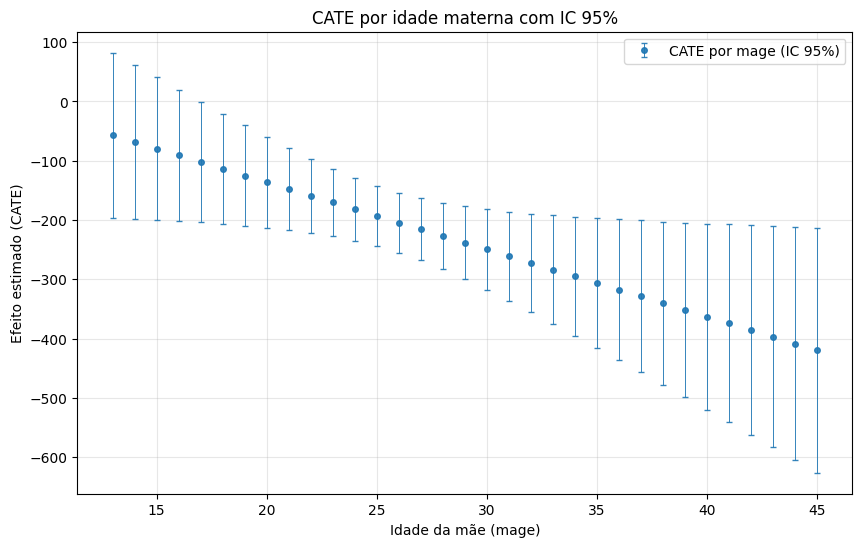

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Obter valores únicos de 'mage' e suas contagens
mage_levels = np.sort(df['mage'].dropna().unique())
mage_counts = df['mage'].value_counts().reindex(mage_levels, fill_value=0)

# Construir grade variando apenas 'mage', mantendo demais covariáveis fixas na média
X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base] * len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

# Calcular CATE e intervalo de confiança
cate_vals = estimator.effect(X_grid)
ci_low, ci_high = estimator.effect_interval(X_grid, alpha=0.05)

# Organizar resultados
res = pd.DataFrame({
    'mage': mage_levels,
    'cate': cate_vals,
    'ci_low': ci_low,
    'ci_high': ci_high,
    'n_obs': mage_counts.values
}).sort_values('mage').reset_index(drop=True)

# Plotar CATE com barras de IC
plt.figure(figsize=(10, 6))
plt.errorbar(
    res['mage'], res['cate'],
    yerr=[res['cate'] - res['ci_low'], res['ci_high'] - res['cate']],
    fmt='o', capsize=2, elinewidth=0.7, markersize=4, alpha=0.9,
    label='CATE por mage (IC 95%)'
)
plt.xlabel('Idade da mãe (mage)')
plt.ylabel('Efeito estimado (CATE)')
plt.title('CATE por idade materna com IC 95%')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Alguns modelos não-lineares

***CausalForestDML***
- **Modelo final:** floresta causal (Wager, 2018; Athey, 2019).  
- **Inferência:** oferece intervalos de confiança via *Bootstrap-of-Little-Bags*.  
- **Comentário:**  
Não exige caracterização explícita da heterogeneidade. Aprende diretamente o CATE de forma **não linear** e flexível. Bom quando a relação entre $X$ e o efeito é muito complexa.  
- **não precisa de caracterização explícita**, pois aprende a heterogeneidade diretamente com árvores/ florestas, com ICs baseados em *Bootstrap-of-Little-Bags*.

***OrthoForestDML***
* Modelo final: floresta ortogonal (Orthogonal Random Forest, Oprescu, Syrgkanis & Wu, 2020).
* Inferência: também pode usar Bootstrap-of-Little-Bags (BLB) para construir intervalos de confiança.
* Comentário:
  * Usa a ideia de Neyman orthogonalization: antes de estimar o efeito, residualiza $Y$ em relação a $X$ e $T$ em relação a $X$. Isso garante que a estimação do CATE seja robusta a erros na modelagem das funções auxiliares (nuisances).
  * É mais robusto que o CausalForestDML: se o modelo da propensão ou do outcome estiver mal especificado, ainda assim pode obter consistência (dupla robustez).
  * Suporta tanto tratamentos binários quanto contínuos (ou mesmo vetoriais), o que o torna mais flexível para cenários de intensidade ou dose do tratamento.
  * Muito útil em contextos de alta dimensionalidade de $X$, porque a ortogonalização ajuda a controlar viés.


Enquanto o CausalForestDML é ideal quando se quer algo próximo ao Generalized Random Forest clássico (heterogeneidade aprendida direto via árvores, forte em inferência para tratamento binário), o OrthoForestDML é indicado quando:
* o tratamento é contínuo ou multidimensional,
* há risco de misspecification dos modelos auxiliares,
* ou quando se busca robustez adicional via ortogonalização.

### CausalForestDML - Forest Double Machine Learning


Causal Forest é uma extensão dos Random Forests tradicionalmente usados para previsão, mas projetado para estimar efeitos causais — especialmente efeitos heterogêneos (CATE).

* Athey, S., & Wager, S. (2018). Estimation and Inference of Heterogeneous Treatment Effects using Random Forests.
* Athey, S. (2019). Generalized Random Forests.

In [28]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [29]:
X = df[['casada', 'mage', 'medu', 'fhisp', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'nprenatal', 'mrace', 'frace', 'fage', 'fedu']]
T = df['D']
Y = df['Y']

In [30]:
# Modelos para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Causal Forest como modelo final

cf_dml = CausalForestDML(model_y=model_y,
                         model_t=model_t,
                         discrete_treatment=True,
                         n_estimators=5000,
                         min_samples_leaf=15,
                         max_depth=5,
                         random_state=123,
                         honest=True,
                         inference=True)

cf_dml.fit(Y, T, X=X, cache_values=True)

cf_dml.ate(X)


np.float64(-206.22929101674055)

In [31]:
print(cf_dml.summary())

Population summary of CATE predictions on Training Data
               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
  -206.229       50.39 -4.093    0.0      -304.992      -107.467
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
   59.875        -296.124         -45.879
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
      78.257       -345.609        -12.449
        Doubly Robust ATE on Training Data Results       
    point_estimate stderr zstat  pvalue ci_lower ci_upper
---------------------------------------------------------
ATE       -207.132  29.22 -7.089    0.0 -264.402 -149.862
     Doubly Robust ATT(T=0) on Training Data Results      
    point_estimate stderr  zstat  pvalue ci_lower ci_

* Com base exclusivamente na média dos CATEs estimados, o efeito médio estimado do tabagismo é –213g
* Doubly Robust ATE (baseado em influência orthogonal)
  * Essa é a estimativa mais confiável do ATE, pois vem do método de influência com ortogonalização — ou seja, é onde o estimador é realmente duplamente robusto.
* ATT(T=0): efeito médio se os não fumantes tivessem fumado → –216 g, altamente significativo
* ATT(T=1): efeito médio entre os que fumaram → –173 g, não significativo (alta variância)

***Quais são as variáveis mais importantes para o modelo?***

O Causal Forest apresenta a importância relativa das variáveis utilizadas no modelo de previsão. Basta acessar o objeto `feature_importances_`. Vejamos o exemplo:

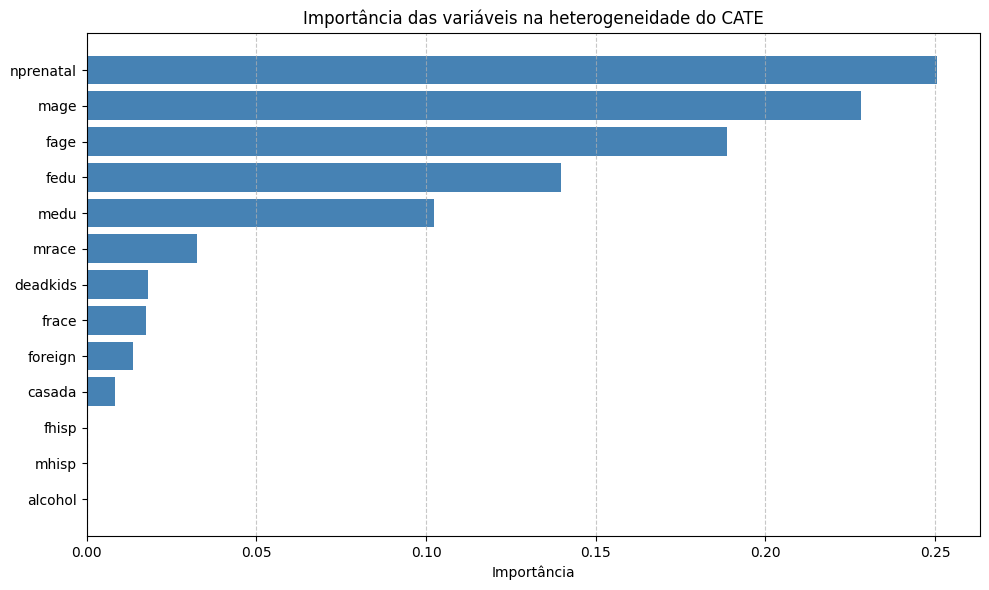

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Obter importâncias e nomes das variáveis
importances = cf_dml.feature_importances_
features = np.array(X.columns)

# Ordenar do maior para o menor
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = features[sorted_idx]

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='steelblue')
plt.xlabel('Importância')
plt.title('Importância das variáveis na heterogeneidade do CATE')
plt.gca().invert_yaxis()  # Coloca a mais importante no topo
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* o modelo mostra que a variável `nprenatal` contribui com 1/4 da explicação da heterogeneidade dos efeitos;
* Ou seja, ela é usada frequentemente nos splits das árvores da floresta causal para distinguir subgrupos com diferentes efeitos do tratamento.

Assim como fizemos anteriormente, podemos explorar o CATE definindo pontos X específicos, assim como fizemos com o LinearDML. E podemos aproveitar a não linearidade das florestas causais para verificar os efeitos nos diferentes níveis de uma covariável específica. Vejamos essa segunda possibilidade.

Vamos avaliar o efeito heterogêneodo fumo no peso dos bebês para diferentes **idades das gestantes** (a segunda variável mais importante para a composição do estimador).

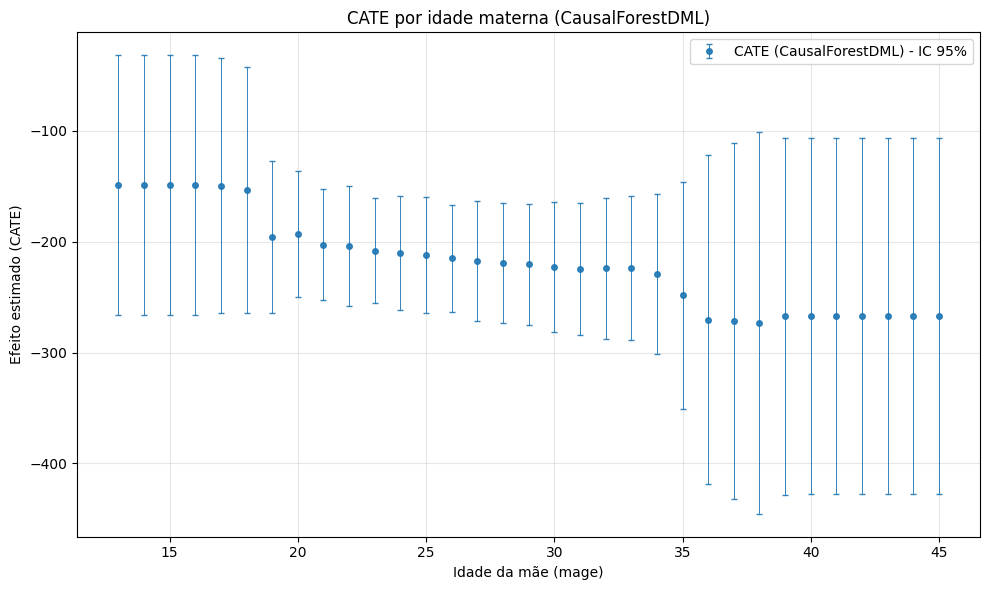

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Níveis de 'mage' e contagens
mage_levels = np.sort(df['mage'].dropna().unique())
mage_counts = df['mage'].value_counts().reindex(mage_levels, fill_value=0)

# 2) Perfil-base (médias) e grade variando apenas 'mage'
X_base = X.mean(axis=0).to_frame().T
X_grid = pd.concat([X_base] * len(mage_levels), ignore_index=True)
X_grid['mage'] = mage_levels

# 3) CATE e IC 95% com CausalForestDML
cate_vals = cf_dml.effect(X_grid)
ci_low, ci_high = cf_dml.effect_interval(X_grid, alpha=0.05)

# 4) DataFrame de resultados
res_cf = pd.DataFrame({
    'mage': mage_levels,
    'cate': cate_vals,
    'ci_low': ci_low,
    'ci_high': ci_high,
    'n_obs': mage_counts.values
}).sort_values('mage').reset_index(drop=True)

# 5) Gráfico: pontos + barras de erro (IC 95%)
plt.figure(figsize=(10, 6))
plt.errorbar(
    res_cf['mage'], res_cf['cate'],
    yerr=[res_cf['cate'] - res_cf['ci_low'], res_cf['ci_high'] - res_cf['cate']],
    fmt='o', capsize=2, elinewidth=0.7, markersize=4, alpha=0.9,
    label='CATE (CausalForestDML) - IC 95%'
)
plt.xlabel('Idade da mãe (mage)')
plt.ylabel('Efeito estimado (CATE)')
plt.title('CATE por idade materna (CausalForestDML)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


### OrthoForestDML - Orthogonal Random Forest

O ponto de partida é o mesmo do CausalForestDML: usar o Neyman orthogonal score (Chernozhukov et al., 2018) para lidar com confundimento. Isso envolve residualizar $Y$ e $D$ em relação a $X$, antes de estimar o efeito heterogêneo $\tau(x)$. 

A ideia central é reduzir o viés que surge quando usamos machine learning nas primeiras etapas.







***Tratamento binário***

In [34]:
# =========================
# DMLOrthoForest no seu exemplo
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from econml.orf import DMLOrthoForest
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Dados
X = df[['casada','mage','medu','fhisp','mhisp','foreign','alcohol','deadkids', 'nprenatal','mrace','frace','fage','fedu']]
T = df['D']     # pode ser binário (0/1) ou intensidade contínua
Y = df['Y']

# Dummies conforme seu pipeline
X = pd.get_dummies(X, drop_first=True)

In [35]:
# Modelos de nuisance
model_Y = GradientBoostingRegressor(n_estimators=200, random_state=123)
model_T = GradientBoostingClassifier(n_estimators=200, random_state=123)

In [36]:
# ----- Ajuste do DMLOrthoForest -----
orf = DMLOrthoForest(
    n_trees=500,          # mais árvores -> mais estável
    min_leaf_size=50,      # folhas maiores evitam 1 classe só
    max_depth=6,           # limita overfitting local
    subsample_ratio=0.9,   # mais amostras por árvore
    bootstrap=False,
    model_Y=model_Y,
    model_T=model_T,
    discrete_treatment=True,   # <<< importante para binário
    n_jobs=-1,
    random_state=123
)
# usar BLB para intervals
orf.fit(Y, T, X=X, inference='blb')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  30 out of  33 | elapsed:   35.4s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   36.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  30 out of  33 | elapsed:   21.8s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   22.7s finished


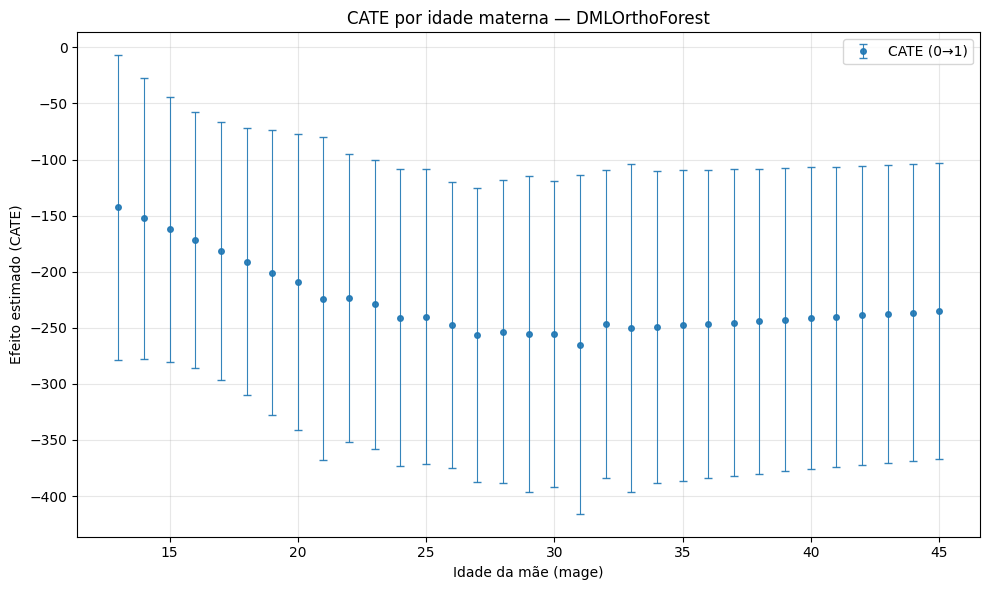

In [37]:
# =========================
# CATE vs mage (nas médias das demais covariáveis)
# =========================
mage_levels = np.sort(df['mage'].dropna().unique())
X_base = X.mean(axis=0).to_frame().T
X_grid_mage = pd.concat([X_base] * len(mage_levels), ignore_index=True)
X_grid_mage['mage'] = mage_levels

T0, T1 = 0, 1
cate_m = orf.effect(X_grid_mage, T0=T0, T1=T1)
lo_m, hi_m = orf.effect_interval(X_grid_mage, T0=T0, T1=T1, alpha=0.05)

plt.figure(figsize=(10, 6))
plt.errorbar(
    mage_levels, cate_m,
    yerr=[cate_m - lo_m, hi_m - cate_m],
    fmt='o', capsize=3, elinewidth=0.8, markersize=4, alpha=0.9,
    label=('CATE (0→1)')
)
plt.xlabel('Idade da mãe (mage)')
plt.ylabel('Efeito estimado (CATE)')
plt.title('CATE por idade materna — DMLOrthoForest')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Os intervalos de confiança são largos, mas todos são diferentes de zero. há uma redução do ponto médio de aproximadamente -150 para valores próximos ao -250 a partir da idade de 25 anos. Após essa idade, os valores médios se estabilizam.

***Tratamento Contínuo***

Agora vamos analisar se o tratamento fosse contínuo. Na nossa base, há uma variável de intensidade do fumo, `msmoke`, que mostra quantos cigarros são fumados por dia.

In [38]:
import pandas as pd

# garanta a ordem correta das categorias (se necessário)
order = ['0 daily', '1-5 daily', '6-10 daily', '11+ daily']
df['msmoke'] = pd.Categorical(df['msmoke'], categories=order, ordered=True)

# mapeamentos
map_mid = {
    '0 daily': 0,
    '1-5 daily': 3,
    '6-10 daily': 8,
    '11+ daily': 12  # ajuste se quiser um outro representativo (ex.: 15)
}
map_ord = {k: i for i, k in enumerate(order)}  # 0,1,2,3 (ordinal)

# variáveis de tratamento
df['T_cont'] = df['msmoke'].map(map_mid).astype(float) 


Vamos utilizar um estimador de Spline para suavizar o efeito do tratamento.

In [43]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from patsy import dmatrix

class NaturalCubicSplineFeaturizer(BaseEstimator, TransformerMixin):
    """
    Natural cubic spline featurizer for a 1D continuous treatment.
    Produces a design matrix from patsy.cr with chosen degrees of freedom.
    """
    def __init__(self, df=5, include_bias=False):
        self.df = df
        self.include_bias = include_bias
        self._colnames = None

    def fit(self, X, y=None):
        # X must be 1D or 2D with single column
        x = np.asarray(X).ravel()
        # Learn column structure once to stabilize feature names/order
        dm = dmatrix(f"cr(x, df={self.df})", {"x": x}, return_type='dataframe')
        if not self.include_bias:
            # patsy already returns no intercept for cr; keep as-is
            pass
        self._colnames = list(dm.columns)
        return self

    def transform(self, X):
        x = np.asarray(X).ravel()
        dm = dmatrix(f"cr(x, df={self.df})", {"x": x}, return_type='dataframe')
        dm = dm[self._colnames]  # ensure consistent column order
        return np.asarray(dm)


In [49]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from econml.orf import DMLOrthoForest

treat_spline = NaturalCubicSplineFeaturizer(df=5)

orf = DMLOrthoForest(
    n_trees=300,
    min_leaf_size=50,
    max_depth=6,
    subsample_ratio=0.9,
    bootstrap=False,
    model_Y=RandomForestRegressor(n_estimators=300, random_state=123),
    model_T=MultiOutputRegressor(RandomForestRegressor(n_estimators=300, random_state=123)),
    treatment_featurizer=treat_spline,
    discrete_treatment=False,
    lambda_reg=5e-2,     # << estabiliza a inversão local
    n_jobs=-1,
    random_state=123,
)
orf.fit(Y=Y, T=T.reshape(-1,1), X=X, inference='blb')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

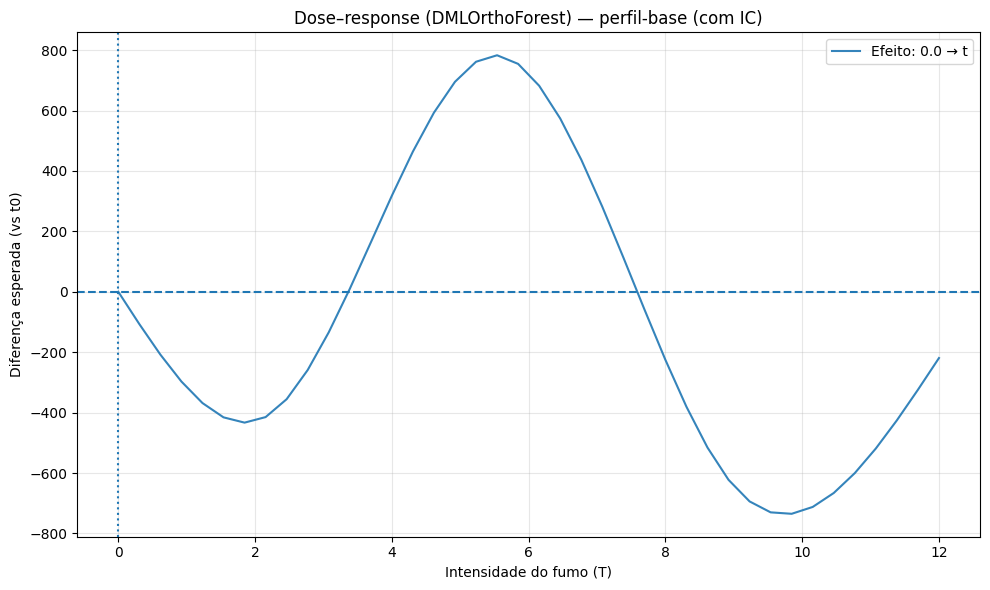

In [50]:
import numpy as np
import matplotlib.pyplot as plt

X_mat = X
T_arr = T.reshape(-1, 1)

t_min, t_max = np.quantile(T_arr.ravel(), [0.05, 0.95])
t_grid = np.linspace(t_min, t_max, 40)
t0 = 0.0

X_ref = X.mean(axis=0).to_frame().T if hasattr(X, "mean") else np.nanmean(X_mat, axis=0, keepdims=True)

eff, lo, hi = [], [], []
for t in t_grid:
    e = orf.effect(X_ref, T0=float(t0), T1=float(t)).ravel()[0]
    eff.append(e)
    try:
        l, h = orf.effect_interval(X_ref, T0=float(t0), T1=float(t), alpha=0.05)
        lo.append(l.ravel()[0]); hi.append(h.ravel()[0])
    except Exception:
        lo.append(np.nan); hi.append(np.nan)

eff, lo, hi = map(np.asarray, (eff, lo, hi))
mask_ic = np.isfinite(lo) & np.isfinite(hi)

plt.figure(figsize=(10,6))
plt.plot(t_grid, eff, alpha=0.9, label=f'Efeito: {t0:.1f} → t')
if mask_ic.any():
    plt.fill_between(t_grid[mask_ic], lo[mask_ic], hi[mask_ic], alpha=0.18, label='IC 95%')
plt.axhline(0, ls='--'); plt.axvline(t0, ls=':')
plt.xlabel('Intensidade do fumo (T)'); plt.ylabel('Diferença esperada (vs t0)')
plt.title('Dose–response (DMLOrthoForest) — perfil-base (com IC)')
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
# ============================================================
# ORF (DMLOrthoForest) — Cross-section com spline no tratamento
# Curva dose–resposta: perfil-base (com IC) e média sobre X
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from patsy import dmatrix, build_design_matrices
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from econml.orf import DMLOrthoForest

# ---------------------------
# Tratamento mapeado (exemplo msmoke)
# ---------------------------
order = ['0 daily', '1-5 daily', '6-10 daily', '11+ daily']
df['msmoke'] = pd.Categorical(df['msmoke'], categories=order, ordered=True)
map_mid = {'0 daily': 0, '1-5 daily': 3, '6-10 daily': 8, '11+ daily': 12}
df['T_cont'] = df['msmoke'].map(map_mid).astype(float)

Y_col = 'Y'          # outcome
T_col = 'T_cont'     # tratamento contínuo
X_cols = ['casada','mage','medu','fhisp','mhisp','foreign',
          'alcohol','deadkids','nprenatal','mrace','frace','fage','fedu']

# Se precisar dummies para categóricas em X, descomente:
# df = pd.get_dummies(df, columns=['mrace','frace','foreign', ...], drop_first=True)
# e ajuste X_cols para os novos nomes.

# ---------------------------
# Featurizer Spline CONGELADO
# ---------------------------
class NaturalCubicSplineFeaturizer(BaseEstimator, TransformerMixin):
    def __init__(self, df=5):
        self.df = df
        self.design_info_ = None
    def fit(self, X, y=None):
        x = np.asarray(X).ravel()
        dm = dmatrix(f"cr(x, df={self.df})", {"x": x}, return_type="dataframe")
        self.design_info_ = dm.design_info
        return self
    def transform(self, X):
        if self.design_info_ is None:
            raise RuntimeError("Featurizer must be fit before transform.")
        x = np.asarray(X).ravel()
        dm = build_design_matrices([self.design_info_], {"x": x})[0]
        return np.asarray(dm)

# ---------------------------
# Extração e saneamento
# ---------------------------
Y = df[Y_col].to_numpy(dtype=float)                  # (n,)
T = df[T_col].to_numpy(dtype=float).reshape(-1,1)    # (n,1)
X = df[X_cols].astype(float) if len(X_cols)>0 else pd.DataFrame(index=df.index)

mask = np.isfinite(Y) & np.isfinite(T).ravel()
if len(X_cols)>0:
    mask &= np.isfinite(X.to_numpy()).all(axis=1)

Y, T = Y[mask], T[mask]
X = X.loc[mask]

# TRIM do suporte de T para o FIT (recomendado)
pL, pU = np.quantile(T.ravel(), [0.05, 0.95])
keep = (T.ravel() >= pL) & (T.ravel() <= pU)
Y_fit, T_fit = Y[keep], T[keep]
X_fit = X.iloc[keep, :] if len(X_cols)>0 else pd.DataFrame(index=np.where(keep)[0])

# ---------------------------
# Nuisances & ORF
# ---------------------------
treat_spline = NaturalCubicSplineFeaturizer(df=5)

model_Y = RandomForestRegressor(n_estimators=300, random_state=123)
model_T = MultiOutputRegressor(RandomForestRegressor(n_estimators=300, random_state=123))

orf = DMLOrthoForest(
    n_trees=300,
    min_leaf_size=50,
    max_depth=6,
    subsample_ratio=0.9,
    bootstrap=False,
    model_Y=model_Y,
    model_T=model_T,
    treatment_featurizer=treat_spline,
    discrete_treatment=False,   # contínuo = False
    lambda_reg=5e-2,            # estabiliza ICs locais
    n_jobs=-1,
    random_state=123,
)

# BLB para ICs no perfil-base
orf.fit(Y=Y_fit, T=T_fit, X=X_fit, inference='blb')

# ---------------------------
# Curvas dose–resposta
# ---------------------------
t_lo, t_hi = np.quantile(T_fit.ravel(), [0.10, 0.90])
t_grid = np.linspace(t_lo, t_hi, 40)
t0 = t_lo  # se tiver T=0 e fizer sentido, use t0=0.0

# (A) Perfil-base (com IC 95%)
X_ref = X_fit.mean(axis=0).to_frame().T if len(X_cols)>0 else None

eff_ref, lo_ref, hi_ref = [], [], []
for t in t_grid:
    e = orf.effect(X_ref, T0=float(t0), T1=float(t)).ravel()[0] if X_ref is not None else \
        orf.effect(None, T0=float(t0), T1=float(t)).ravel()[0]
    eff_ref.append(e)
    try:
        l, h = (orf.effect_interval(X_ref, T0=float(t0), T1=float(t), alpha=0.05)
                if X_ref is not None else
                orf.effect_interval(None, T0=float(t0), T1=float(t), alpha=0.05))
        lo_ref.append(l.ravel()[0]); hi_ref.append(h.ravel()[0])
    except Exception:
        lo_ref.append(np.nan); hi_ref.append(np.nan)

eff_ref = np.asarray(eff_ref); lo_ref = np.asarray(lo_ref); hi_ref = np.asarray(hi_ref)
mask_ic = np.isfinite(lo_ref) & np.isfinite(hi_ref)

plt.figure(figsize=(9,5))
plt.plot(t_grid, eff_ref, lw=2, label='Efeito (perfil-base)')
if mask_ic.any():
    plt.fill_between(t_grid[mask_ic], lo_ref[mask_ic], hi_ref[mask_ic], alpha=0.18, label='IC 95%')
plt.axvline(t0, ls=':'); plt.axhline(0, ls='--')
plt.xlabel('Tratamento (T)'); plt.ylabel('ΔY vs t0')
plt.title('Dose–resposta — perfil-base (ORF + spline)')
plt.legend(); plt.tight_layout(); plt.show()

# (B) Média sobre X (sem IC interno)
X_arg = X_fit.values if len(X_cols)>0 else None
eff_mean = [orf.effect(X_arg, T0=float(t0), T1=float(t)).mean() for t in t_grid]

plt.figure(figsize=(9,5))
plt.plot(t_grid, eff_mean, lw=2, label='Efeito médio sobre X')
plt.axvline(t0, ls=':'); plt.axhline(0, ls='--')
plt.xlabel('Tratamento (T)'); plt.ylabel('E[Y(T) - Y(T0) | X]')
plt.title('Dose–resposta — média sobre X (ORF + spline)')
plt.legend(); plt.tight_layout(); plt.show()

# (C) Efeito marginal médio (diagnóstico de não linearidade)
me = orf.marginal_effect(T=t_grid.reshape(-1,1), X=X_arg)  # (m, n_fit)
me_avg = me.mean(axis=1)

plt.figure(figsize=(9,5))
plt.plot(t_grid, me_avg, lw=2)
plt.axhline(0, ls='--')
plt.xlabel('Tratamento (T)'); plt.ylabel('dY/dT (médio)')
plt.title('Efeito marginal médio (não linearidade local)')
plt.tight_layout(); plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.2min


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.multioutput import MultiOutputRegressor


X = pd.get_dummies(df[['casada','mage','medu','fhisp','mhisp','foreign',
                       'alcohol','deadkids','nprenatal','mrace','frace',
                       'fage','fedu']], drop_first=True)
Y = df['Y'].astype(float).values
T = df['T_cont'].astype(float).values.reshape(-1, 1)   # <<< 2D

model_Y = GradientBoostingRegressor(n_estimators=200, random_state=123)
model_T = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=200, random_state=123))  # <<<

orf = DMLOrthoForest(
    n_trees=1000,
    min_leaf_size=30,
    max_depth=8,
    subsample_ratio=0.9,
    bootstrap=False,
    model_Y=model_Y,
    model_T=model_T,                      # << agora multi-output
    discrete_treatment=False,
    treatment_featurizer=PolynomialFeatures(degree=2, include_bias=False),
    n_jobs=-1,
    random_state=123
)
# garanta T como matriz 2D antes do fit (n,1):
T_arr = df['T_cont'].astype(float).values.reshape(-1, 1)
Y_arr = df['Y'].astype(float).values
X_mat = pd.get_dummies(X, drop_first=True)

orf.fit(Y_arr, T_arr, X=X_mat, inference='blb')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 22.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 21.8min finished


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\danie\OneDrive\00000 - 2025\0_Python_Estimators\econml-env\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend

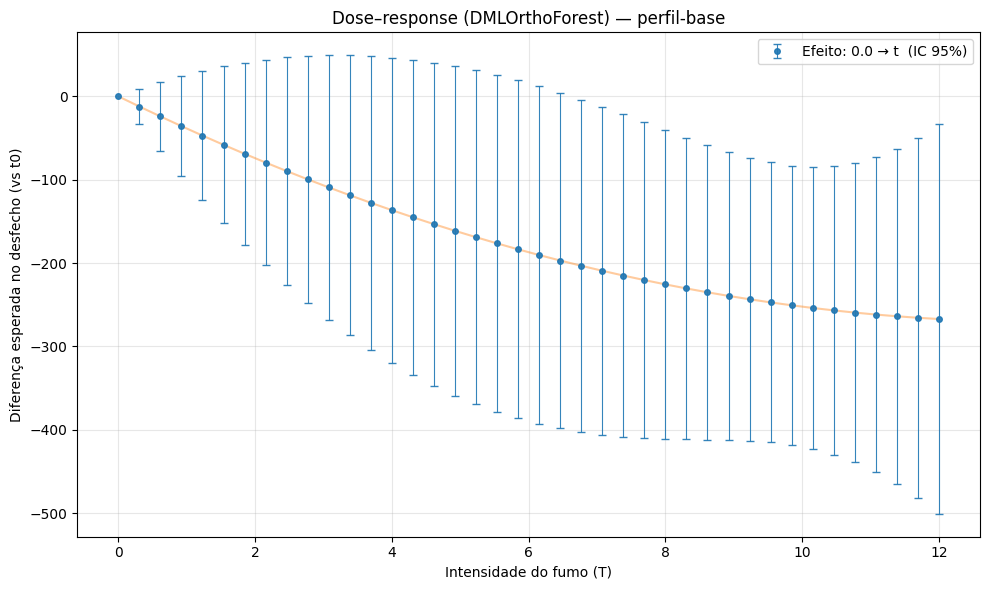

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Use os mesmos objetos que foram usados no fit:
# orf  -> DMLOrthoForest já ajustado com inference='blb'
# X_mat = pd.get_dummies(..., drop_first=True)   # as features usadas no fit
# T_arr = df['T_cont'].astype(float).values.reshape(-1, 1)

# 1) grade no suporte (evita extrapolação nas pontas)
t_min, t_max = np.quantile(T_arr.ravel(), [0.05, 0.95])
t_grid = np.linspace(t_min, t_max, 40)

# 2) referência: não fumante
t0 = 0.0

# 3) perfil-base: médias das covariáveis (mesmas colunas de X_mat!)
X_ref = X_mat.mean(axis=0).to_frame().T

# 4) efeito (t0 -> t) + IC 95% no perfil-base
eff, lo, hi = [], [], []
for t in t_grid:
    e = orf.effect(X_ref, T0=t0, T1=float(t)).ravel()[0]
    ci_low, ci_high = orf.effect_interval(X_ref, T0=t0, T1=float(t), alpha=0.05)
    eff.append(e)
    lo.append(ci_low.ravel()[0])
    hi.append(ci_high.ravel()[0])

# 5) plot
eff = np.asarray(eff); lo = np.asarray(lo); hi = np.asarray(hi)
plt.figure(figsize=(10, 6))
plt.errorbar(
    t_grid, eff,
    yerr=[eff - lo, hi - eff],
    fmt='o', markersize=4, capsize=3, elinewidth=0.8, alpha=0.9,
    label=f'Efeito: {t0:.1f} → t  (IC 95%)'
)
plt.plot(t_grid, eff, alpha=0.4)
plt.xlabel('Intensidade do fumo (T)')
plt.ylabel('Diferença esperada no desfecho (vs t0)')
plt.title('Dose–response (DMLOrthoForest) — perfil-base')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
invalid value encountered in multiply
invalid value encountered in multiply
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

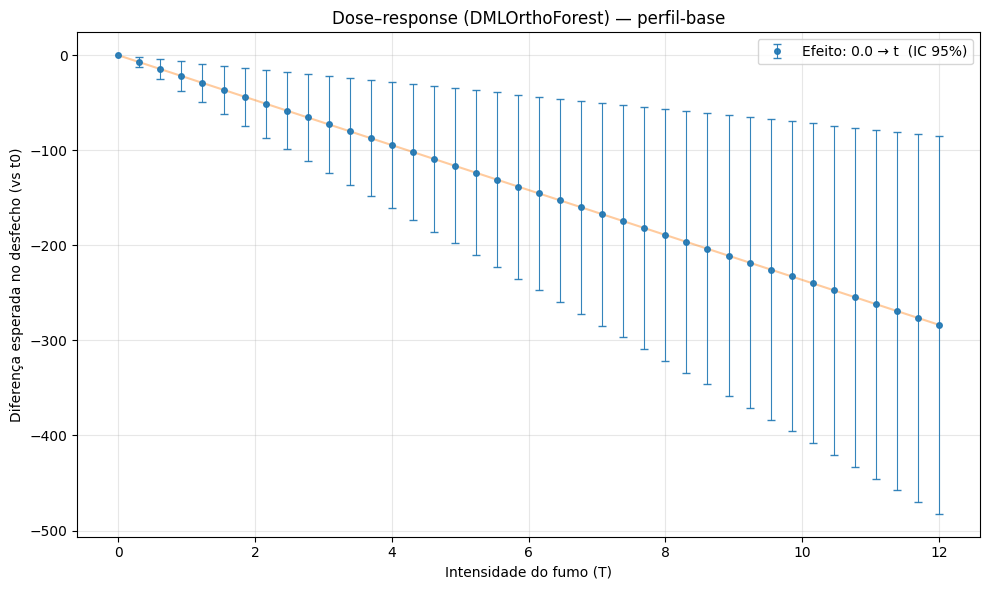

In [100]:
# 1) grade de intensidades no suporte dos dados (evita extremos)
t_min, t_max = np.quantile(T, [0.01, 0.99])
t_grid = np.linspace(t_min, t_max, 40)

# 2) referência: não fumante (t0 = 0)
t0 = 0.0

# 3) perfil-base: médias das covariáveis
X_ref = X.mean(axis=0).to_frame().T

# 4) efeito (t0 -> t) + IC 95% no perfil-base
eff, lo, hi = [], [], []
for t in t_grid:
    e = orf.effect(X_ref, T0=t0, T1=t).ravel()[0]
    ci_low, ci_high = orf.effect_interval(X_ref, T0=t0, T1=t, alpha=0.05)
    eff.append(e)
    lo.append(ci_low.ravel()[0])
    hi.append(ci_high.ravel()[0])

# 5) plot (perfil-base, com IC)
plt.figure(figsize=(10, 6))
plt.errorbar(
    t_grid, eff,
    yerr=[np.array(eff) - np.array(lo), np.array(hi) - np.array(eff)],
    fmt='o', markersize=4, capsize=3, elinewidth=0.8, alpha=0.9,
    label=f'Efeito: {t0:.1f} → t  (IC 95%)'
)
plt.plot(t_grid, eff, alpha=0.4)
plt.xlabel('Intensidade do fumo (T)')
plt.ylabel('Diferença esperada no desfecho (vs t0)')
plt.title('Dose–response (DMLOrthoForest) — perfil-base')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

***GATE***

É possivel criarmos grupos de tratamento condicional (GATE - Group Average Treatment Effect), os quais podem ser úteis para identificar subgrupos com efeitos semelhantes.

O GATE pode ser útil para o pesquisador, principalmente na hora de formular políticas públicas, pois permite entender como diferentes grupos da população podem reagir de maneira distinta a uma intervenção.

**Como podemos avaliar o desempenho do modelo CATE?**

Cada uma das classes DML tem um atributo score_ depois de serem ajustadas. Então, é possível acessar esse atributo e comparar o desempenho em diferentes parâmetros de modelagem (quanto menor a pontuação, melhor):

## Considerações Finais

Vejamos um resumo do que foi visto.

* O principal objetivo do DML é ajustar e remover a variável de confusão de forma que a variável de interesse (tratamento) e o resultado fiquem "ortogonais" ou "independentes".
* DML combina métodos de aprendizado de máquina com técnicas econométricas para estimar efeitos causais.
* A técnica geralmente envolve a aplicação de aprendizado de máquina para prever tanto o tratamento quanto o resultado usando as variáveis observáveis de confusão, e então os resíduos dessas previsões são utilizados em um segundo estágio para estimar o efeito causal.
  * Primeiro Estágio: Aplicar modelos de aprendizado de máquina para prever a variável de tratamento e o resultado.
  * Segundo Estágio: Utilizar os resíduos dessas previsões em um modelo de regressão para estimar o efeito causal.


In [ ]:
from econml.orf import OrthogonalRandomForest
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

# Modelos auxiliares para outcome e tratamento
model_y = GradientBoostingRegressor(n_estimators=100, random_state=123)
model_t = GradientBoostingClassifier(n_estimators=100, random_state=123)

# Estimador Orthogonal Random Forest
orf = OrthogonalRandomForest(
    n_trees=500,            # Número de árvores na floresta
    min_leaf_size=5,        # Número mínimo de observações por folha
    max_depth=10,           # Profundidade máxima da árvore
    subsample_ratio=0.7,    # Proporção de amostra usada em cada árvore
    model_Y=model_y,        # Modelo para prever o outcome
    model_T=model_t,        # Modelo para prever o tratamento
    discrete_treatment=True, # Tratamento binário
    random_state=123
)

# Ajuste (fit)
orf.fit(Y, T, X=X, W=None)

# Predição do CATE (theta(x))
cate_pred = orf.effect(X)

# Estimação do ATE
ate_pred = cate_pred.mean()

print(f"Estimativa do ATE via ORF: {ate_pred}")



* Chernozhukov et al (2016) considera o caso em que $\theta(X)$ é uma constante (ATE), ou uma função linear de $X$ (CATE) de baixa dimensão.
* Nie (2017) cai em um Espaço de Hilbert do Kernel Reprodutor (RKHS).
* Chernozhukov et al (2018) consideram o caso de um espaço linear esparso de alta dimensão, onde $\theta(X) = <\theta, \phi(X)>$ para algum mapeamento de características de alta dimensão conhecido e onde $\theta$ tem muito poucas entradas diferentes de zero (esparsas)
* Athey (2019), entre outros resultados, considera o caso em que $\theta(X)$ é uma função lipschitz não paramétrica e usa modelos de floresta aleatória para ajustar a função. Esse métodos permite maior flexibilidade para modelar $\theta(X)$ sem assumir linearidade.
* Foster (2019) permite modelos arbitrários $\theta(X)$ e fornecer resultados com base em medidas de complexidade de amostra do espaço do modelo (por exemplo, complexidade de Rademacher, entropia métrica). Esse métodos permite maior flexibilidade para modelar $\theta(X)$ sem assumir linearidade.

A principal vantagem do DML é que se fizermos suposições paramétricas sobre $\theta(X)$, então se obtém taxas de estimativa rápidas e, para muitos casos de estimadores de estágio final, também normalidade assintótica na estimativa do segundo estágio $\hat{\theta}$.
